In [12]:
# Imports
import pandas as pd
import numpy as np
# ML
from MacroRandomForest import MRF

In [13]:
# Generate simulated data
n = 1000
vars = 15
data = pd.DataFrame(index=range(n))
time = np.arange(n)

# df 
x_vars = pd.DataFrame(index=range(n))

# Add independent variables
for i in range(vars):
    x_vars['x' + str(i)] = np.random.normal(0, 1, n)

# Add dependent variable
weights = np.random.normal(0, 0.5, vars)
weights[0] = 0.8
weights[1] = 0.8
weights[2] = 0.8
dependent_data = np.dot(x_vars, weights) + np.random.normal(0, 1, n)
data['y'] = dependent_data

# Create dataset
data = pd.concat([data, x_vars], axis=1)
data

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,-4.824687,-0.266056,0.076255,-1.795598,-1.485661,0.696619,-0.880798,0.187670,0.021389,-0.017775,0.330117,0.154363,0.175930,0.258893,0.472550,-1.202345
1,0.715196,1.083365,0.685216,-0.682399,-0.267218,0.091681,0.149086,0.818150,1.339825,-1.305175,0.592848,-1.324355,-0.256539,0.485482,-0.832062,-0.127593
2,-0.548272,-0.709879,-0.061688,0.776239,-1.375245,-1.504023,-0.326307,-0.144181,-1.170397,-1.705142,-1.019218,-0.333791,-1.157253,-0.979797,-0.222428,-0.206020
3,1.772213,-0.037886,-0.210450,1.165600,-2.333774,0.305842,-0.118932,1.955639,-0.268676,-0.764843,-1.621871,0.655030,0.251116,0.100871,-0.483869,-0.205266
4,2.056830,0.393543,0.885397,0.700518,-1.428791,-0.977844,2.406901,-0.641847,-0.692609,-1.126912,-0.863237,1.245387,1.282679,-0.021174,0.253487,1.811988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.412975,0.529328,1.420793,-0.302112,0.604975,0.611428,-0.245918,2.277364,-0.694334,0.447916,-0.435818,1.784737,-0.341124,-1.403792,-0.979725,0.235785
996,-1.574625,-0.354109,0.322760,-0.254191,0.059298,-0.868098,0.523123,-0.559598,-0.488649,0.646804,2.069617,0.161526,-0.580267,0.159568,-0.183363,-1.011312
997,1.421642,2.240561,-1.320591,0.586900,0.522911,1.760341,0.831151,1.235214,-0.195848,0.521987,-0.825529,0.404101,1.006770,0.590841,0.586482,-0.132694
998,-1.635784,-0.131644,-0.903785,0.193312,0.855718,-0.458568,0.694408,-0.479638,-2.777097,-1.445613,-1.115990,-0.276954,-0.680717,0.960880,-0.559366,-1.328763


In [ ]:
# Dependent variables
y_var = 'y'
y_pos = data.columns.get_loc(y_var)

# Exogenous variables
S_vars = [x for x in data.columns if x != y_var]
S_pos = np.array([data.columns.get_loc(x) for x in S_vars])

# Independent variables
x_vars = ['x0', 'x1', 'x2']
x_pos = np.array([data.columns.get_loc(x) for x in x_vars])

# Predict last 50 observations
oos_pos = np.arange(len(data) - 50 , len(data)) # Out of sample positions

In [15]:
# Print
print(f"Data:\n{data.head()}")
print(f"y_pos: {y_pos}")
print(f"S_pos: {S_pos}")
print(f"x_pos: {x_pos}")
print(f"oos_pos: {oos_pos}")

Data:
          y        x0        x1        x2        x3        x4        x5  \
0 -4.824687 -0.266056  0.076255 -1.795598 -1.485661  0.696619 -0.880798   
1  0.715196  1.083365  0.685216 -0.682399 -0.267218  0.091681  0.149086   
2 -0.548272 -0.709879 -0.061688  0.776239 -1.375245 -1.504023 -0.326307   
3  1.772213 -0.037886 -0.210450  1.165600 -2.333774  0.305842 -0.118932   
4  2.056830  0.393543  0.885397  0.700518 -1.428791 -0.977844  2.406901   

         x6        x7        x8        x9       x10       x11       x12  \
0  0.187670  0.021389 -0.017775  0.330117  0.154363  0.175930  0.258893   
1  0.818150  1.339825 -1.305175  0.592848 -1.324355 -0.256539  0.485482   
2 -0.144181 -1.170397 -1.705142 -1.019218 -0.333791 -1.157253 -0.979797   
3  1.955639 -0.268676 -0.764843 -1.621871  0.655030  0.251116  0.100871   
4 -0.641847 -0.692609 -1.126912 -0.863237  1.245387  1.282679 -0.021174   

        x13       x14  
0  0.472550 -1.202345  
1 -0.832062 -0.127593  
2 -0.222428 -0.20602

In [16]:
# Build model
model = MRF.MacroRandomForest(
    data = data,
    x_pos = x_pos,
    oos_pos = oos_pos,
    S_pos = S_pos,
    y_pos = y_pos,
)

In [17]:
# Run model
output = model._ensemble_loop()

Tree 3 out of 50
Tree 2 out of 50
Tree 6 out of 50
Tree 7 out of 50
Tree 1 out of 50
Tree 9 out of 50
Tree 11 out of 50
Tree 13 out of 50
Tree 4 out of 50
Tree 15 out of 50
Tree 14 out of 50
Tree 20 out of 50
Tree 21 out of 50
Tree 17 out of 50
Tree 8 out of 50
Tree 5 out of 50
Tree 18 out of 50
Tree 12 out of 50
Tree 10 out of 50
Tree 19 out of 50
Tree 16 out of 50
Tree 22 out of 50
Tree 23 out of 50
Tree 24 out of 50
Tree 25 out of 50
Tree 26 out of 50
Tree 27 out of 50
Tree 28 out of 50
Tree 29 out of 50
Tree 30 out of 50
Tree 31 out of 50
Tree 32 out of 50
Tree 33 out of 50
Tree 34 out of 50
Tree 35 out of 50
Tree 36 out of 50
Tree 37 out of 50
Tree 38 out of 50
Tree 39 out of 50
Tree 40 out of 50
Tree 41 out of 50
Tree 42 out of 50
Tree 43 out of 50
Tree 44 out of 50
Tree 45 out of 50
Tree 46 out of 50
Tree 47 out of 50
Tree 48 out of 50
Tree 49 out of 50
Tree 50 out of 50


In [18]:
forecasts = output['pred']
betas = output['betas']

In [19]:
# Plotting
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'OOS predictions of MRF')

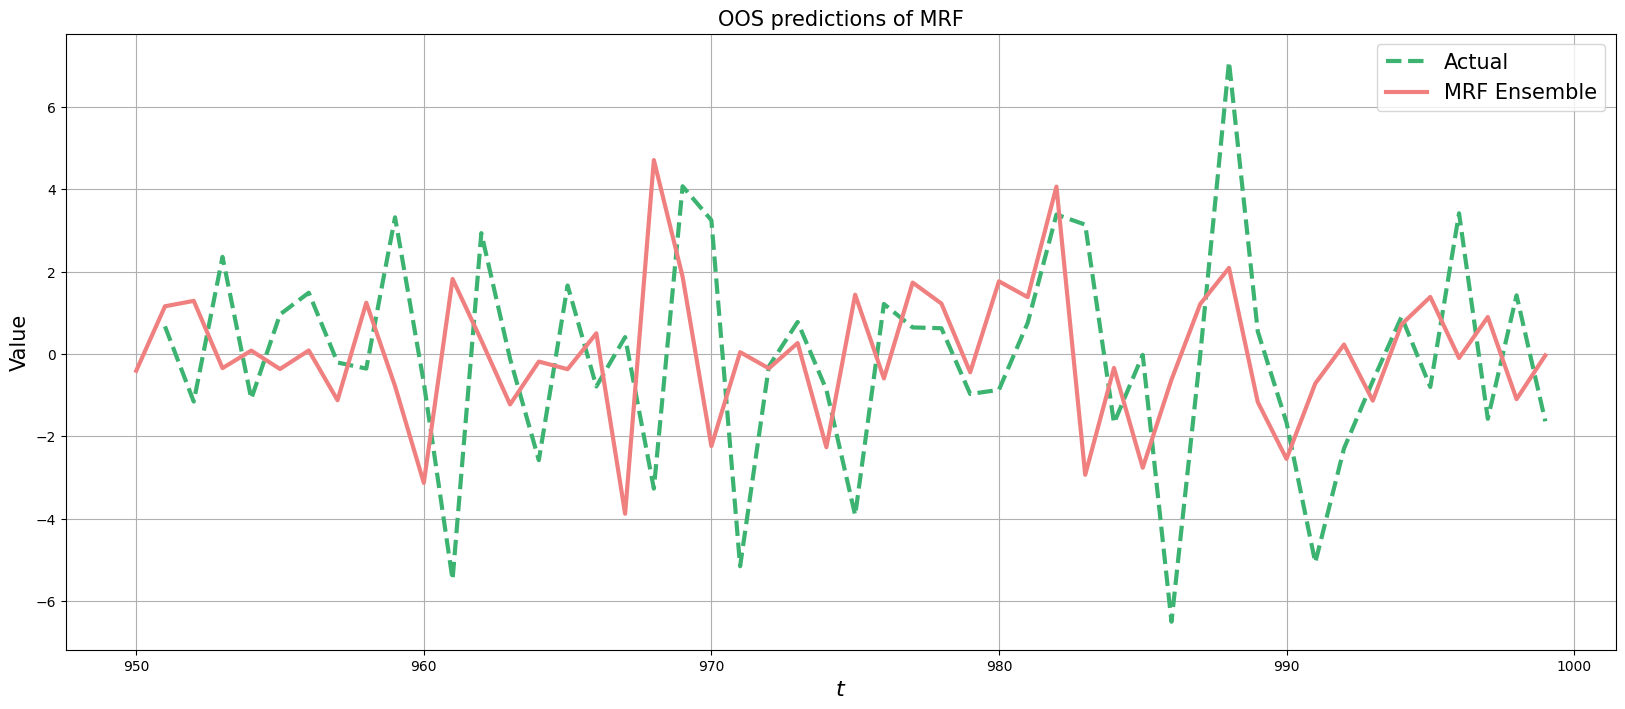

In [21]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

# Plotting actual versus original
ax.plot(data[0].loc[oos_pos].shift(1), label = 'Actual', linewidth = 3, color ='mediumseagreen', linestyle = '--')
ax.plot(forecasts, color = 'lightcoral', linewidth = 3, label = "MRF Ensemble")

ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

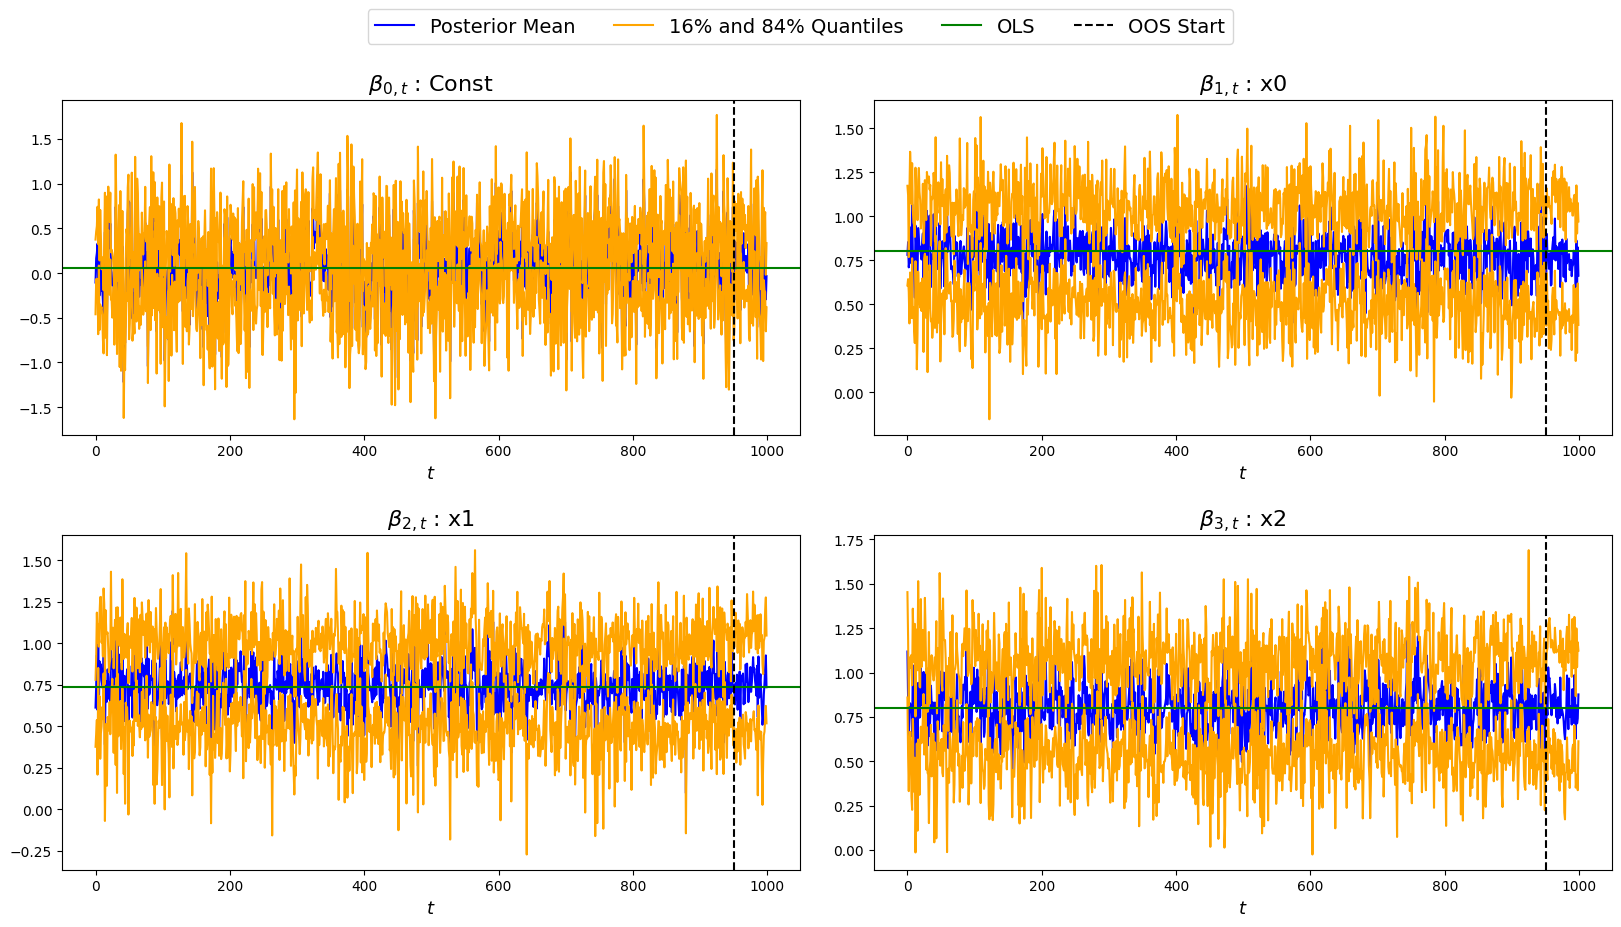

In [23]:
model.band_plots()